# 02 - Missing Data Imputation with Statistical Methods

- Types of imputation
  - Numerical
  - Temporal
  - Categorical
## Preprocessing
- Determine if Temporal
- Split out numerical vs categorical

## Base Cases
- Drop Rows
- Drop Columns

## Numerical
- Mean
- Meadian
- Most Freq
- Set Value
## Temporal
- Backfill
- Forwardfill
- Linear
- Polynomial
## Categorical
- Most Freq

> Unforturtunately Categorical data does not have a lot statistical methods of imputation as the data may have many specific subject matter related differences.


# Preprocessing

- Download this [dataset](https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023)


In [49]:
import pandas as pd
df = pd.read_csv('/content/world-data-2023.csv')
df_limited = df.iloc[:,:7]
df_limited.isna().sum()

Country                   0
Density\n(P/Km2)          0
Abbreviation              7
Agricultural Land( %)     7
Land Area(Km2)            1
Armed Forces size        24
Birth Rate                6
dtype: int64

In [50]:
df_limited.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49
1,Albania,105,AL,43.10%,"28,748","9,000",11.78
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28
3,Andorra,164,AD,40.00%,468,NaN,7.20
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73


In [52]:
df_limited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                195 non-null    object 
 1   Density
(P/Km2)        195 non-null    object 
 2   Abbreviation           188 non-null    object 
 3   Agricultural Land( %)  188 non-null    object 
 4   Land Area(Km2)         194 non-null    object 
 5   Armed Forces size      171 non-null    object 
 6   Birth Rate             189 non-null    float64
dtypes: float64(1), object(6)
memory usage: 10.8+ KB


In [53]:
df_limited.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate'],
      dtype='object')

In [54]:
categorical_cols = ['Country','Abbreviation']
numerical_cols = ['Density\n(P/Km2)', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size']


df_cat = df_limited[categorical_cols]
df_num = df_limited[numerical_cols]
for col in numerical_cols:
  df_num[col] = df_limited[col].str.replace(',','').str.replace('%','').astype('float64')

df_num

<ipython-input-54-05294a6399b0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[col] = df_limited[col].str.replace(',','').str.replace('%','').astype('float64')


,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size
0,60.0,58.1,652230.0,323000.0
1,105.0,43.1,28748.0,9000.0
2,18.0,17.4,2381741.0,317000.0
3,164.0,40.0,468.0,NaN
4,26.0,47.5,1246700.0,117000.0
...,...,...,...,...
190,32.0,24.5,912050.0,343000.0
191,314.0,39.3,331210.0,522000.0
192,56.0,44.6,527968.0,40000.0
193,25.0,32.1,752618.0,16000.0


# Naive Method

## Drop Rows


In [22]:
df_limited_dropped = df_limited.dropna()
df_limited_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 194
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                167 non-null    object 
 1   Density
(P/Km2)        167 non-null    object 
 2   Abbreviation           167 non-null    object 
 3   Agricultural Land( %)  167 non-null    object 
 4   Land Area(Km2)         167 non-null    object 
 5   Armed Forces size      167 non-null    object 
 6   Birth Rate             167 non-null    float64
dtypes: float64(1), object(6)
memory usage: 10.4+ KB


- Notice we now have 167 of the initial 195 rows.
- This is almost 20% of the data, which can drastically effect model performance.

## Drop Columns

In [32]:
# Drop Columns
# df_limited_col_drop = df
df_limited_col_drop = df_limited[df_limited.columns[~df_limited.isnull().any()]]

df_limited_col_drop

,Country,Density\n(P/Km2)
0,Afghanistan,60
1,Albania,105
2,Algeria,18
3,Andorra,164
4,Angola,26
...,...,...
190,Venezuela,32
191,Vietnam,314
192,Yemen,56
193,Zambia,25


- This may be an extreme case, but you want to be more selective of which columns you're stripping for model development. These columns may give powerful insights.

# Numerical

- For the purposes of implementing these imputation we'll use birth rate as the target (what our model is predicting)

In [74]:
X = df_num
y = df_limited[['Birth Rate']]

## Mean

- Skewed distributions and outliers can impact mean value imputation has.
- The mean may not correlate well to the filled in null.

In [34]:
df_num.describe()

,Birth Rate
count,189.000000
mean,20.214974
std,9.945774
min,5.900000
25%,11.300000
50%,17.950000
75%,28.750000
max,46.080000


In [77]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
columns = X.columns.append(y.columns)
mean_imputed = imp_mean.fit_transform(X, y)
df_mean_imputed = pd.DataFrame(mean_imputed, columns=X.columns)
df_mean_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Density
(P/Km2)        195 non-null    float64
 1   Agricultural Land( %)  195 non-null    float64
 2   Land Area(Km2)         195 non-null    float64
 3   Armed Forces size      195 non-null    float64
dtypes: float64(4)
memory usage: 6.2 KB


- ==TODO==: Explination

## Median

In [78]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
columns = X.columns.append(y.columns)
mean_imputed = imp_mean.fit_transform(X, y)
df_mean_imputed = pd.DataFrame(mean_imputed, columns=X.columns)
df_mean_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Density
(P/Km2)        195 non-null    float64
 1   Agricultural Land( %)  195 non-null    float64
 2   Land Area(Km2)         195 non-null    float64
 3   Armed Forces size      195 non-null    float64
dtypes: float64(4)
memory usage: 6.2 KB


## Most Frequent

In [80]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
columns = X.columns.append(y.columns)
mean_imputed = imp_mean.fit_transform(X, y)
df_mean_imputed = pd.DataFrame(mean_imputed, columns=X.columns)
df_mean_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Density
(P/Km2)        195 non-null    float64
 1   Agricultural Land( %)  195 non-null    float64
 2   Land Area(Km2)         195 non-null    float64
 3   Armed Forces size      195 non-null    float64
dtypes: float64(4)
memory usage: 6.2 KB


## Set Value

In [82]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=20)
columns = X.columns.append(y.columns)
mean_imputed = imp_mean.fit_transform(X, y)
df_mean_imputed = pd.DataFrame(mean_imputed, columns=X.columns)
df_mean_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Density
(P/Km2)        195 non-null    float64
 1   Agricultural Land( %)  195 non-null    float64
 2   Land Area(Km2)         195 non-null    float64
 3   Armed Forces size      195 non-null    float64
dtypes: float64(4)
memory usage: 6.2 KB


# Temporal

- One of the best ways to manipulate temporal data is with a time series library like Darts
- Using fill_missing_values function on the time series allows you to determine the type of fill
- [darts](https://unit8co.github.io/darts/generated_api/darts.utils.missing_values.html?highlight=fill_missing_values#darts.utils.missing_values.fill_missing_values) link to the function.
- can give a type of fit from [pandas_dataframe_interpolate](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)

In [2]:
!pip install darts --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 13.1 MB/s eta 0:00:00


In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries

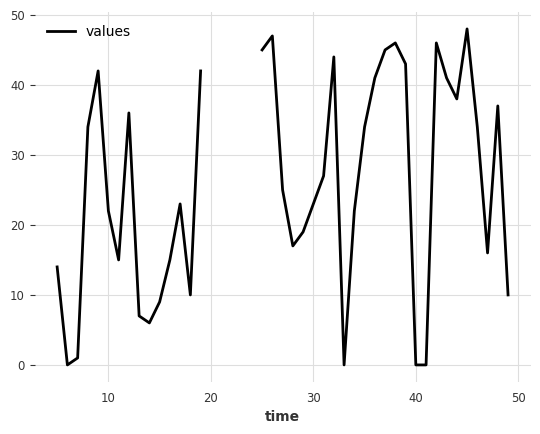

In [30]:
from darts.utils.missing_values import fill_missing_values

values = np.random.randint(50, size=50)
df = pd.DataFrame({'values':values})
df.head()

df[20:25] = np.nan
df[:5] = np.nan
ts = TimeSeries.from_dataframe(df)
ts.plot()

## Backfill - Linear

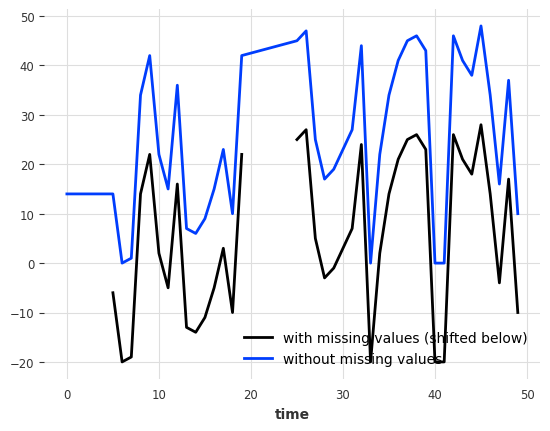

In [34]:
df = pd.DataFrame({'values':values})
df[20:25] = np.nan
df[:5] = np.nan
ts = TimeSeries.from_dataframe(df)

(ts - 20).plot(label="with missing values (shifted below)")
filled_series = fill_missing_values(ts, fit='linear', limit_direction='backward')
filled_series.plot(label="without missing values")

## Fowardfill - Linear

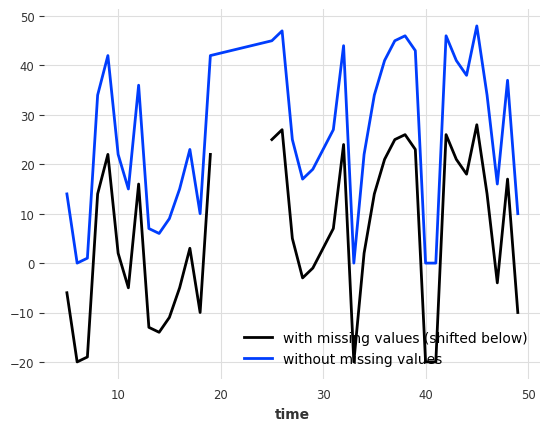

In [35]:
df = pd.DataFrame({'values':values})
df[20:25] = np.nan
df[:5] = np.nan
ts = TimeSeries.from_dataframe(df)

(ts - 20).plot(label="with missing values (shifted below)")
filled_series = fill_missing_values(ts, fit='linear', limit_direction='forward')
filled_series.plot(label="without missing values")

## Both - Linear

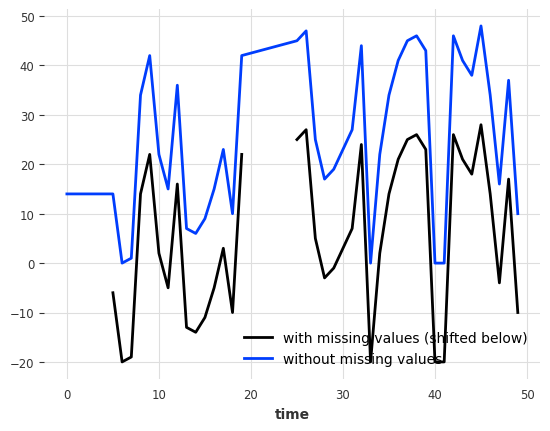

In [46]:
df = pd.DataFrame({'values':values})
df[20:25] = np.nan
df[:5] = np.nan
ts = TimeSeries.from_dataframe(df)

(ts - 20).plot(label="with missing values (shifted below)")
filled_series = fill_missing_values(ts, method='linear')
filled_series.plot(label="without missing values")

## Backfill - Polynomial

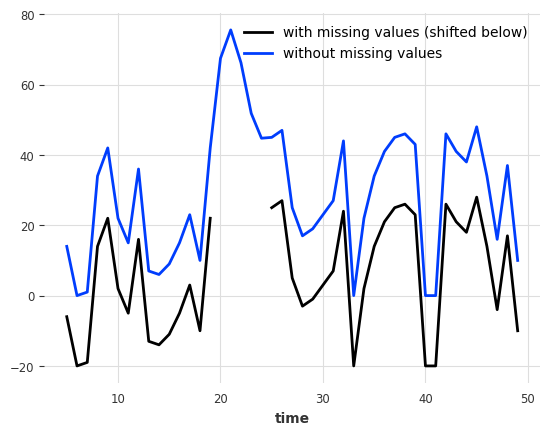

In [39]:
df = pd.DataFrame({'values':values})
df[20:25] = np.nan
df[:5] = np.nan
ts = TimeSeries.from_dataframe(df)

(ts - 20).plot(label="with missing values (shifted below)")
filled_series = fill_missing_values(ts, method='polynomial', limit_direction='backward', order=2)
filled_series.plot(label="without missing values")

## Forwardfill - Polynomial

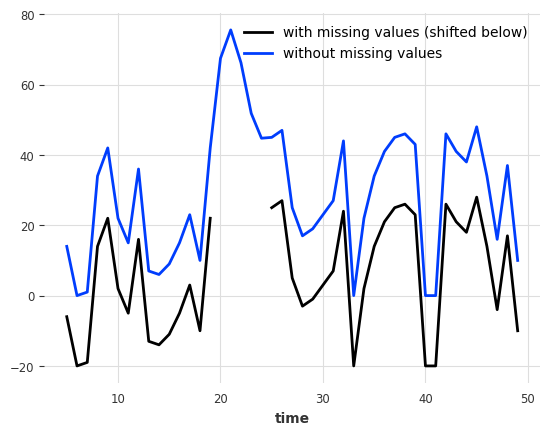

In [40]:
df = pd.DataFrame({'values':values})
df[20:25] = np.nan
df[:5] = np.nan
ts = TimeSeries.from_dataframe(df)

(ts - 20).plot(label="with missing values (shifted below)")
filled_series = fill_missing_values(ts, method='polynomial', limit_direction='forward', order=2)
filled_series.plot(label="without missing values")

## Both - Polynomial

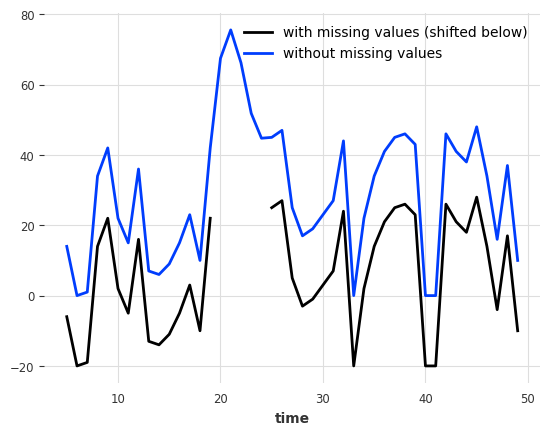

In [45]:
df = pd.DataFrame({'values':values})
df[20:25] = np.nan
df[:5] = np.nan
ts = TimeSeries.from_dataframe(df)

(ts - 20).plot(label="with missing values (shifted below)")
filled_series = fill_missing_values(ts, method='polynomial', order=2)
filled_series.plot(label="without missing values")

# Categorical

# Mode imputation:
- Replace the missing values with the most frequent value in the column. You can use the `SimpleImputer` class from sklearn to do this. Here's an example code snippet:


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df['column_name'] = imputer.fit_transform(df[['column_name']])




# KNN imputation:
Use K-Nearest Neighbors algorithm to fill in missing values. You can use the `KNNImputer` class from sklearn to do this. Here's an example code snippet:



In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df['column_name'] = imputer.fit_transform(df[['column_name']])

# Multiple Imputation by Chained Equations (MICE):
Use MICE algorithm to fill in missing values. You can use the `IterativeImputer` class from sklearn to do this. Here's an example code snippet:

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
df['column_name'] = imputer.fit_transform(df[['column_name']])